<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#benchmark-files" data-toc-modified-id="benchmark-files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>benchmark files</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Extra-simulations" data-toc-modified-id="Extra-simulations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extra simulations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize the total computational resources required for all of the simulations

# Var

In [1]:
base_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/'

sim_runs = c(
    'GTDBr202_n9k_train', 'GTDBr202_n9k_train_d12m', 'GTDBr202_n9k_train_d20m',  'GTDBr202_n9k_train_sigma0.5',
    'GTDBr202_n9k_train_CAMI-err', 'GTDBr202_n9k_train_CAMI-err_d20m', 'GTDBr202_n9k_train_CAMI-err_r2r3',
    'GTDBr202_n9k_novel-family_test', 'GTDBr202_n9k_novel-family_test2',
    'GTDBr202_n9k_novel-family_test_kmer/kmer21-31-41', 
    'GTDBr202_n9k_novel-family_test_kmer/kmer21-41-61',
    'GTDBr202_n9k_novel-family_test_kmer/kmer21-41-61-81-101-121',
    'GTDBr202_n9k_novel-family_test_kmer/kmer51-61-71',
    'GTDBr202_n9k_novel-family_test_kmer/kmer51-71-91',
    'GTDBr202_n9k_novel-family_test_kmer/kmer91-101-111')

# params
threads = 4

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [3]:
setDTthreads(threads)
df.dims()
set.seed(8342)
clustermq_setup(scheduler = c("multicore"))

Loading required package: clustermq



# benchmark files

In [31]:
get_files = function(sim_run, base_dir){
    message('Searching sim run: ', sim_run)
    D = file.path(base_dir, sim_run, 'benchmarks')
    print(D)
    files = list_files(D, '*.txt')
    if(length(files) == 0){
        warning('No benchmark files found for run: ', sim_run)
    }
    return(files)
}

#get_files('GTDBr202_n9k_train', base_dir) %>% length
get_files('GTDBr202_n9k_novel-family_test_kmer/kmer21-31-41', base_dir) %>% length

Searching sim run: GTDBr202_n9k_novel-family_test_kmer/kmer21-31-41



[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm//GTDBr202_n9k_novel-family_test_kmer/kmer21-31-41/benchmarks"


[1] 145

In [38]:
# getting all files
bmk_files = sim_runs %>%
    Q(get_files, sim_run=., const=list(base_dir=base_dir), n_jobs=threads) 
names(bmk_files) = sim_runs
bmk_files %>% length

Starting 4 cores ...

Running 15 calculations (1 objs/0 Mb common; 1 calls/chunk) ...


[==>-------------------------------------------------]   7% (4/4 wrk) eta: 25s

[======>---------------------------------------------]  13% (4/4 wrk) eta: 14s

[=========>------------------------------------------]  20% (4/4 wrk) eta:  9s

[=============>--------------------------------------]  27% (4/4 wrk) eta:  8s

[================>-----------------------------------]  33% (4/4 wrk) eta:  7s

[====================>-------------------------------]  40% (4/4 wrk) eta:  6s

[=======================>----------------------------]  47% (4/4 wrk) eta:  5s

[===========================>------------------------]  53% (4/4 wrk) eta:  4s

[==============================>---------------------]  60% (4/4 wrk) eta:  3s

[==================================>-----------------]  67% (4/4 wrk) eta:  2s

[=====================================>--------------]  73% (4/4 wrk) eta:  2s

[===============================

[1] 15

In [106]:
# summary
bmk_files %>% lapply(length) %>% unlist %>% as.vector %>% summary_x('files per run')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
files per run,145,145,1209,2431.467,2703,10995,4094.342,1671.508


In [51]:
# merging all bmk tables per run
merge_tables = function(sim_run, L){
    dt = L[[sim_run]] %>%
        #head(n=3) %>%
        Q(Fread, infile=., n_jobs=threads) %>%
        rbindlist()
    dt$sim_run = sim_run
    return(dt)
}

# merging all tables
bmk = bmk_files %>% names %>%
    lapply(merge_tables, L=bmk_files) %>%
    rbindlist()
bmk

Starting 4 cores ...

Running 10,995 calculations (0 objs/0 Mb common; 5 calls/chunk) ...


[----------------------------------------------------]   0% (4/4 wrk) eta:  1m

[----------------------------------------------------]   1% (4/4 wrk) eta:  1m

[>---------------------------------------------------]   1% (4/4 wrk) eta:  1m

[>---------------------------------------------------]   2% (4/4 wrk) eta:  1m

[>---------------------------------------------------]   3% (4/4 wrk) eta:  1m

[=>--------------------------------------------------]   3% (4/4 wrk) eta:  1m

[=>--------------------------------------------------]   4% (4/4 wrk) eta:  1m

[=>--------------------------------------------------]   5% (4/4 wrk) eta:  1m

[==>-------------------------------------------------]   5% (4/4 wrk) eta:  1m

[==>-------------------------------------------------]   5% (4/4 wrk) eta: 50s

[==>-------------------------------------------------]   5% (4/4 wrk) eta:  1m

[==>------------------------


[===============>------------------------------------]  30% (4/4 wrk) eta: 33s

[===============>------------------------------------]  31% (4/4 wrk) eta: 33s

[===============>------------------------------------]  31% (4/4 wrk) eta: 32s

[===============>------------------------------------]  31% (4/4 wrk) eta: 33s

[===============>------------------------------------]  31% (4/4 wrk) eta: 32s

[===============>------------------------------------]  32% (4/4 wrk) eta: 32s

[================>-----------------------------------]  32% (4/4 wrk) eta: 32s

[================>-----------------------------------]  33% (4/4 wrk) eta: 32s

[================>-----------------------------------]  33% (4/4 wrk) eta: 31s

[================>-----------------------------------]  34% (4/4 wrk) eta: 31s

[=================>----------------------------------]  34% (4/4 wrk) eta: 31s

[=================>----------------------------------]  35% (4/4 wrk) eta: 31s

[=================>--------------------


[=========================================>----------]  80% (4/4 wrk) eta:  9s

[=========================================>----------]  81% (4/4 wrk) eta:  8s

[=========================================>----------]  82% (4/4 wrk) eta:  8s

[==========================================>---------]  82% (4/4 wrk) eta:  8s

[==========================================>---------]  83% (4/4 wrk) eta:  8s

[==========================================>---------]  83% (4/4 wrk) eta:  7s

[==========================================>---------]  84% (4/4 wrk) eta:  7s

[===========================================>--------]  84% (4/4 wrk) eta:  7s

[===========================================>--------]  85% (4/4 wrk) eta:  7s

[===========================================>--------]  85% (4/4 wrk) eta:  6s

[===========================================>--------]  86% (4/4 wrk) eta:  6s

[============================================>-------]  86% (4/4 wrk) eta:  6s

[======================================

limit_output extension: Maximum message size of 20000 exceeded with 20012 characters

## Summary

In [76]:
# summary
bmk$s %>% summary_x('run time (sec)')
bmk$cpu_time %>% summary_x('cpu time (sec)')
bmk$max_vms %>% as.Num %>% summary_x('max virt. mem.')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
run time (sec),0.0224,3.16585,56.0172,2327.202,556.7256,165370.7,67277.95,27466.11


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
cpu time (sec),0,2.36,42.58,1025.785,260.5275,194497.2,79295.41,32372.22


Warning message in as.Num(.):
“NAs introduced by coercion”


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
max virt. mem.,9.7,134.685,792.51,8206.762,7351.645,176137.2,4,65631.67,24806.44


In [84]:
# summary
bmk_s = bmk %>%
    mutate.(sim_run = gsub('/.+', '', sim_run)) %>%
    summarize.(run_time = sum(s),
               cpu_time = sum(cpu_time),
               max_vms = sum(as.Num(max_vms), na.rm=TRUE),
               .by=c(sim_run)) %>%
    mutate.(run_time_hours = run_time / (60 * 60),
            cpu_hours = cpu_time / (60 * 60),
            max_vms_gb = max_vms / 1024)
bmk_s

Warning message in as.Num(max_vms):
“NAs introduced by coercion”
Warning message in as.Num(max_vms):
“NAs introduced by coercion”


sim_run,run_time,cpu_time,max_vms,run_time_hours,cpu_hours,max_vms_gb
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTDBr202_n9k_train,18576544,6290444,86225278,5160.151,1747.3454,84204.37
GTDBr202_n9k_train_d12m,8663719,3242309,23771331,2406.589,900.6414,23214.19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
GTDBr202_n9k_novel-family_test2,5754353,3023134.7,10645089,1598.4313,839.7596,10395.595
GTDBr202_n9k_novel-family_test_kmer,1530956,778314.9,5310632,425.2655,216.1986,5186.164


In [94]:
# summary
cat('Total run time (hours):', bmk_s$run_time_hours %>% sum, '\n')
cat('Total cpu hours:', bmk_s$cpu_hours %>% sum, '\n')

Total run time (hours): 23577.15 
Total cpu hours: 10392.34 


In [95]:
# how cpu & run time diff
bmk %>%
    mutate.(d1 = s - cpu_time) %>%
    .$d1 %>% summary_x('diff in run & cpu time')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
diff in run & cpu time,-166800.4,-7.09885,1.3171,1301.418,63.1187,163127.9,104339.7,42596.5


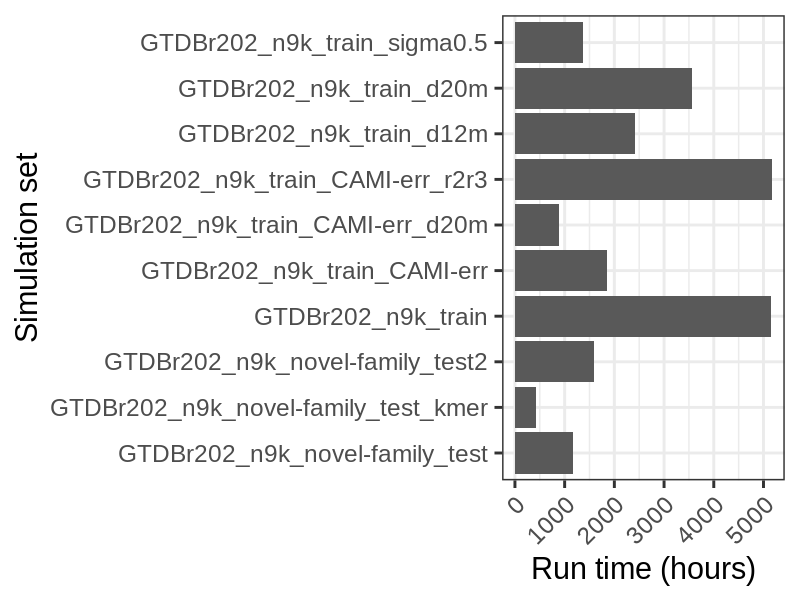

In [98]:
# run time (hours)
p = bmk_s %>%
    ggplot(aes(sim_run, run_time_hours)) +
    geom_bar(stat='identity') +
    labs(y='Run time (hours)', x='Simulation set') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(4,3)
plot(p)

Total cpu hours: 10392.34 


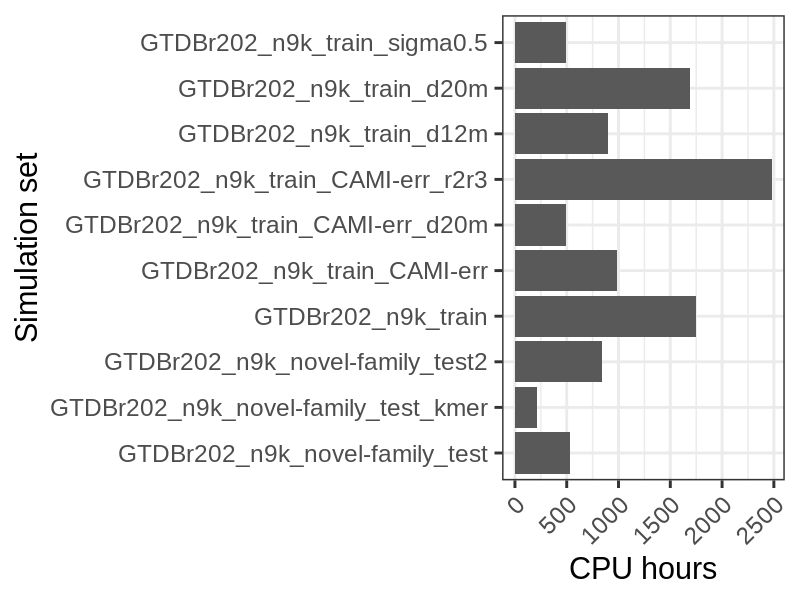

In [99]:
# cpu hours
cat('Total cpu hours:', bmk_s$cpu_hours %>% sum, '\n')
p = bmk_s %>%
    ggplot(aes(sim_run, cpu_hours)) +
    geom_bar(stat='identity') +
    labs(y='CPU hours', x='Simulation set') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(4,3)
plot(p)

Total memory (max Gb): 292269.7 


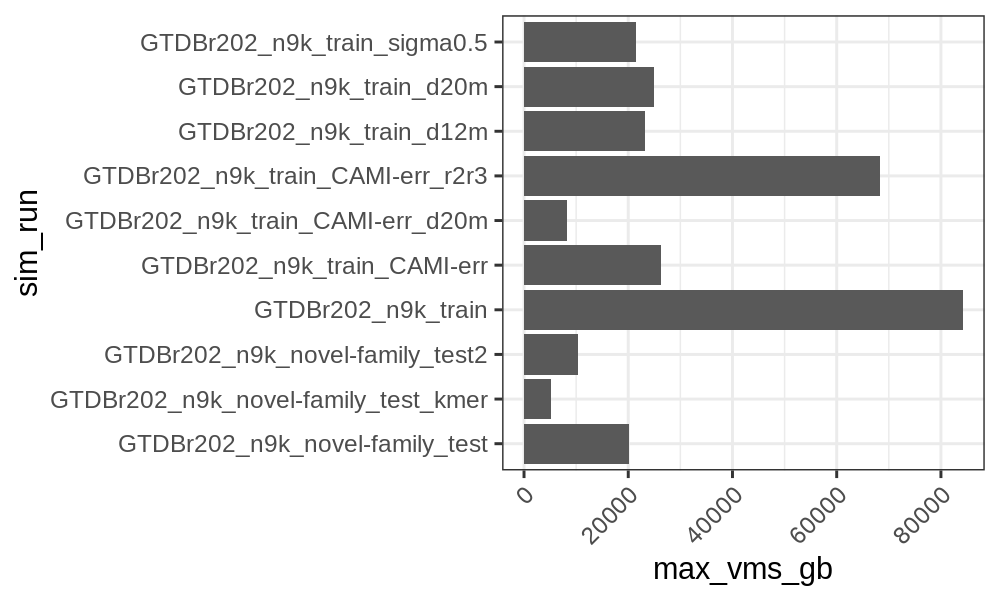

In [79]:
# mem
cat('Total memory (max Gb):', bmk_s$max_vms_gb %>% sum, '\n')
p = bmk_s %>%
    ggplot(aes(sim_run, max_vms_gb)) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(5,3)
plot(p)

In [ ]:
send_email('http://127.0.0.1:9704/notebooks/version2/deepmased/notebooks/06_version2/01_simulation_datasets/03b_GTDBr202/05_benchmark_summary.ipynb')

# Extra simulations

In [5]:
base_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/'

sim_runs = c('GTDBr202_n9k_train_lrg-ins_CAMI-err',
             'GTDBr202_n9k_train_lrg-ins_CAMI-err_r23',
             'GTDBr202_n9k_train_lrg-ins',
             'GTDBr202_n9k_train_lrg-ins_r23')

In [6]:
get_files = function(sim_run, base_dir){
    message('Searching sim run: ', sim_run)
    D = file.path(base_dir, sim_run, 'benchmarks')
    print(D)
    files = list_files(D, '*.txt')
    if(length(files) == 0){
        warning('No benchmark files found for run: ', sim_run)
    }
    return(files)
}


In [7]:
# getting all files
bmk_files = sim_runs %>%
    Q(get_files, sim_run=., const=list(base_dir=base_dir), n_jobs=threads) 
names(bmk_files) = sim_runs
bmk_files %>% length

Starting 4 cores ...

Running 4 calculations (1 objs/0 Mb common; 1 calls/chunk) ...


[============>---------------------------------------]  25% (4/4 wrk) eta:  6s

[=========================>--------------------------]  50% (3/3 wrk) eta:  2s

[======================================>-------------]  75% (2/2 wrk) eta:  1s

[====================================================] 100% (1/1 wrk) eta:  0s
                                                                              

Master: [6.0s 3.4% CPU]; Worker: [avg 20.0% CPU, max 283.1 Mb]



[1] 4

In [10]:
# merging all bmk tables per run
merge_tables = function(sim_run, L){
    dt = L[[sim_run]] %>%
        #head(n=3) %>%
        Q(Fread, infile=., n_jobs=threads) %>%
        rbindlist()
    dt$sim_run = sim_run
    return(dt)
}

# merging all tables
bmk = bmk_files %>% names %>%
    lapply(merge_tables, L=bmk_files) %>%
    rbindlist()
bmk

Starting 4 cores ...

Running 4,196 calculations (0 objs/0 Mb common; 2 calls/chunk) ...


[----------------------------------------------------]   1% (4/4 wrk) eta: 29s

[----------------------------------------------------]   1% (4/4 wrk) eta: 28s

[----------------------------------------------------]   1% (4/4 wrk) eta: 31s

[>---------------------------------------------------]   1% (4/4 wrk) eta: 29s

[>---------------------------------------------------]   1% (4/4 wrk) eta: 30s

[>---------------------------------------------------]   1% (4/4 wrk) eta: 29s

[>---------------------------------------------------]   1% (4/4 wrk) eta: 30s

[>---------------------------------------------------]   1% (4/4 wrk) eta: 29s

[>---------------------------------------------------]   1% (4/4 wrk) eta: 30s

[>---------------------------------------------------]   2% (4/4 wrk) eta: 29s

[>---------------------------------------------------]   2% (4/4 wrk) eta: 28s

[>---------------------------


[==============>-------------------------------------]  28% (4/4 wrk) eta: 15s

[==============>-------------------------------------]  29% (4/4 wrk) eta: 15s

[==============>-------------------------------------]  30% (4/4 wrk) eta: 15s

[===============>------------------------------------]  30% (4/4 wrk) eta: 15s

[===============>------------------------------------]  31% (4/4 wrk) eta: 15s

[===============>------------------------------------]  31% (4/4 wrk) eta: 14s

[===============>------------------------------------]  32% (4/4 wrk) eta: 14s

[================>-----------------------------------]  32% (4/4 wrk) eta: 14s

[================>-----------------------------------]  33% (4/4 wrk) eta: 14s

[================>-----------------------------------]  34% (4/4 wrk) eta: 14s

[=================>----------------------------------]  34% (4/4 wrk) eta: 14s

[=================>----------------------------------]  35% (4/4 wrk) eta: 14s

[=================>--------------------


[==============================================>-----]  89% (4/4 wrk) eta:  2s

[==============================================>-----]  90% (4/4 wrk) eta:  2s

[==============================================>-----]  91% (4/4 wrk) eta:  2s

[===============================================>----]  91% (4/4 wrk) eta:  2s

[===============================================>----]  92% (4/4 wrk) eta:  2s

[===============================================>----]  92% (4/4 wrk) eta:  1s

[===============================================>----]  93% (4/4 wrk) eta:  1s

[================================================>---]  93% (4/4 wrk) eta:  1s

[================================================>---]  94% (4/4 wrk) eta:  1s

[================================================>---]  95% (4/4 wrk) eta:  1s

[=================================================>--]  95% (4/4 wrk) eta:  1s

[=================================================>--]  96% (4/4 wrk) eta:  1s

[======================================

limit_output extension: Maximum message size of 20000 exceeded with 20011 characters

### Summary

In [11]:
# summary
bmk$s %>% summary_x('run time (sec)')
bmk$cpu_time %>% summary_x('cpu time (sec)')
bmk$max_vms %>% as.Num %>% summary_x('max virt. mem.')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
run time (sec),0.0344,3.2296,49.84085,2563.13,512.8941,262430,106885.7,43635.9


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
cpu time (sec),0,2.13,44.38,1378.503,315.1075,256124.8,104421.8,42630.01


Warning message in as.Num(.):
“NAs introduced by coercion”


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
max virt. mem.,12.59,87.8625,658.705,8100.002,4869.767,175011.4,10,65357,24702.62


In [12]:
# summary
bmk_s = bmk %>%
    mutate.(sim_run = gsub('/.+', '', sim_run)) %>%
    summarize.(run_time = sum(s),
               cpu_time = sum(cpu_time),
               max_vms = sum(as.Num(max_vms), na.rm=TRUE),
               .by=c(sim_run)) %>%
    mutate.(run_time_hours = run_time / (60 * 60),
            cpu_hours = cpu_time / (60 * 60),
            max_vms_gb = max_vms / 1024)
bmk_s

Warning message in as.Num(max_vms):
“NAs introduced by coercion”
Warning message in as.Num(max_vms):
“NAs introduced by coercion”


sim_run,run_time,cpu_time,max_vms,run_time_hours,cpu_hours,max_vms_gb
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTDBr202_n9k_train_lrg-ins_CAMI-err,10089818,5605161,34686211,2802.727,1556.989,33873.25
GTDBr202_n9k_train_lrg-ins_CAMI-err_r23,14073470,10043692,59680028,3909.297,2789.915,58281.28
GTDBr202_n9k_train_lrg-ins,13702427,5917976,34415953,3806.230,1643.882,33609.33
GTDBr202_n9k_train_lrg-ins_r23,24218421,11823263,67335060,6727.339,3284.240,65756.89


In [13]:
# summary
cat('Total run time (hours):', bmk_s$run_time_hours %>% sum, '\n')
cat('Total cpu hours:', bmk_s$cpu_hours %>% sum, '\n')

Total run time (hours): 17245.59 
Total cpu hours: 9275.026 


# sessionInfo

In [14]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/DeepMAsED/envs/tidyverse/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] clustermq_0.8.95.1 LeyLabRMisc_0.1.9  tidytable_0.6.3    data.table_1.14.0 
[5] ggplot2_3.3.5      tidyr_1.1.3        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7        pillar_1.6.1      compiler_4.1.0    prettyunits_1.1.1
 [5] progress_1.2.2    base64enc_